---
title: "CSX46 - Class Session 9 - similarity and hierarchical clustering"
author: "Trent VanHawkins"
date: today
format: 
    pdf:
        geometry: "margin=0.75in"
        mathspec: true
        code-overflow: wrap
        cap-location: bottom
        tbl-cap-location: bottom
        header-includes: 
        - \usepackage{fancyhdr, amsthm, amssymb,amsfonts,amsthm, amsmath, bbm}
        - \usepackage{float, tabularx}
        - \floatplacement{table}{H}
        - \pagestyle{fancy}
        - \fancyhead[R]{Notebook 9}
        - \fancyhead[L]{Trent VanHawkins}
        - \fancyfoot[C]{\thepage} # Center page number at bottom of each page
page-layout: full
execute: 
  eval: true
---

In this class session we are going to hierachically cluster (based on Sørensen-Dice similarity) vertices in a directed graph from a landmark paper on human gene regulation (Neph et al., Cell, volume 150, pages 1274-1286, 2012; see PDF on Canvas)

Using Pandas `read_csv`, read in the file `neph_gene_network.txt`, which has two columns of text (first column is the regulator gene, second column is the target gene), into a data frame. The file has no header and is tab-delimited.  Assign the column names of the dataframe to be `regulator` and `target`, respectively.

For this notebook, we will need the python packages `pandas`, `igraph`, `numpy`, `matplotlib.pyplot`, `scipy.cluster.hierarchy`, and `scipy.spatial.distance`.

In [1]:
import igraph
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
import scipy.spatial.distance

Download the file `neph_gene_network.txt` from the S3 bucket at URL `https://csx46.s3-us-west-2.amazonaws.com/neph_gene_network.txt`

In [2]:
!curl https://csx46.s3-us-west-2.amazonaws.com/neph_gene_network.txt > ../DataRaw/neph_gene_network.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  522k  100  522k    0     0  1367k      0 --:--:-- --:--:-- --:--:-- 1368k


Using `pd.read_csv`, read the file `neph_gene_network.txt`; name the two columns of the resulting data frame, `regulator` and `target`.

In [4]:
edge_list_neph = pd.read_csv("../DataRaw/neph_gene_network.txt",
                              sep="\t",
                              names=["regulator","target"])

Load the edge-list data into an undirected `igraph.Graph` object `neph_graph`, using `igraph.Graph.TupleList`. As always, sprint the graph summary using `igraph.Graph.summary`.

In [5]:
neph_graph = igraph.Graph.TupleList(edge_list_neph.values.tolist(), directed=False)
neph_graph.summary()

'IGRAPH UN-- 538 47945 -- \n+ attr: name (v)'

Using the igraph `Graph.similarity_dice()` method, compute a similarity matrix and assign it to variable `S`. Don't forget to specify `loops=False` in the call to `similarity_dice`!

In [6]:
S = neph_graph.similarity_dice(loops=False)

Using the `numpy.matrix` constructor, compute a distance matrix `1-S` and assign to object `D`. What is the shape of `D`?

In [7]:
D = 1 - np.array(S)


Compute the expected length of the upper triangle of the matrix `D`, if we were to convert it to a vector

In [9]:
d = D.shape[0]
int(d*(d-1)/2)

144453

Use `scipy.spatial.distance.squareform` to make a vector-form distance vector from the square-form distance matrix `D`; call the resulting object `vD`. What is the shape of `vD`?

In [11]:
vD = scipy.spatial.distance.squareform(D)
vD.shape

(144453,)

Using `scipy.cluster.hierarchy.linkage` on `vD` (with `method="average")`, perform hierarchical agglomerative clustering.  Assign the resulting object to variable `hc`. What is the type of `hc`?  What is its shape?  

In [12]:
hc = scipy.cluster.hierarchy.linkage(vD, method="average")
print(type(hc))
print(hc.shape)
print(pd.DataFrame(hc).head())

<class 'numpy.ndarray'>
(537, 4)
      0      1         2    3
0  10.0   11.0  0.020179  2.0
1  64.0   66.0  0.020367  2.0
2  65.0   67.0  0.022460  2.0
3   9.0  538.0  0.025672  3.0
4  74.0   75.0  0.029817  2.0


Plot a dendrogram using `scipy.cluster.hierarchy.dendrogram`

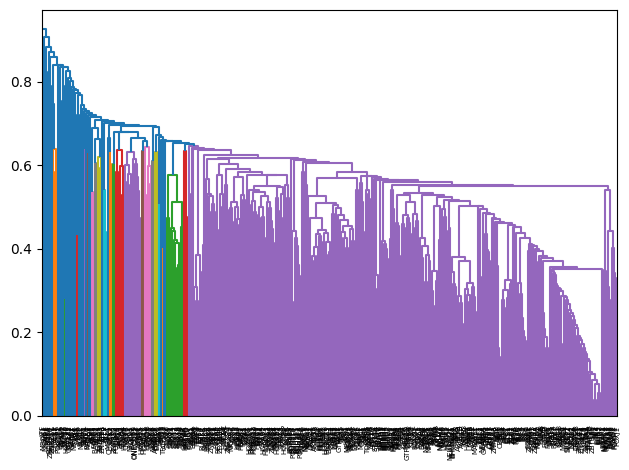

In [13]:
scipy.cluster.hierarchy.dendrogram(hc, labels=neph_graph.vs["name"], leaf_rotation=90)
plt.tight_layout()
plt.show()

Use `scipy.cluster.hierarchy.fcluster` to get clusters from cutting the dendrogram at 0.65. Store the resulting array as variable `clusters`.

In [14]:
clusters = scipy.cluster.hierarchy.fcluster(hc, t=0.65, criterion="distance")

What are the type and shape of `clusters`?

In [16]:
print(type(clusters))
clusters.shape

<class 'numpy.ndarray'>


(538,)

How many clusters are there if we cut the dendrogram at distance of 0.65?  Hint: try `numpy.unique` on the `clusters` object.

In [18]:
len(np.unique(clusters))

60